In [1]:
# https://docs.google.com/document/d/1Q1NgPhCpq9tCzua3kxaL4o0_jcFdcDxpYNBmMa2PvEE/edit#

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('cansim-0800020-eng-6674700030567901031.csv', skiprows=6, skipfooter=9, engine='python')

In [3]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [4]:
from pandas.tseries.offsets import MonthEnd

In [5]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')

In [6]:
print(df.head())

             Unadjusted  Seasonally adjusted
Adjustments                                 
1991-01-31     12588862             15026890
1991-02-28     12154321             15304585
1991-03-31     14337072             15413591
1991-04-30     15108570             15293409
1991-05-31     17225734             15676083


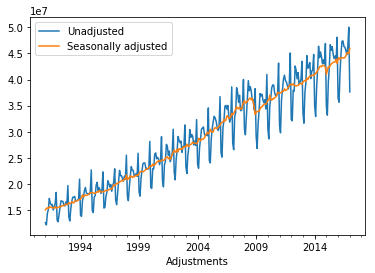

In [7]:
df.plot()

In [8]:
split_date = pd.Timestamp('01-01-2011')
split_date

Timestamp('2011-01-01 00:00:00')

In [9]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

In [10]:
train.head()

,Unadjusted
Adjustments,
1991-01-31,12588862
1991-02-28,12154321
1991-03-31,14337072
1991-04-30,15108570
1991-05-31,17225734


In [11]:
test.head()

,Unadjusted
Adjustments,
2011-01-31,31191594
2011-02-28,29797949
2011-03-31,36099866
2011-04-30,38035760
2011-05-31,40046516


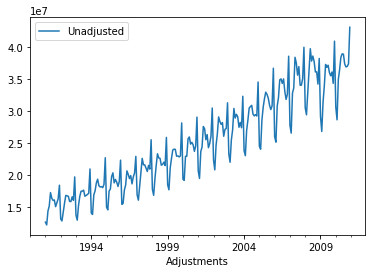

In [12]:
ax =train.plot()
ax

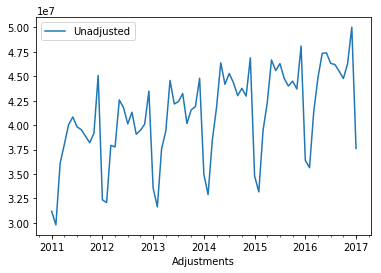

In [13]:
test.plot()

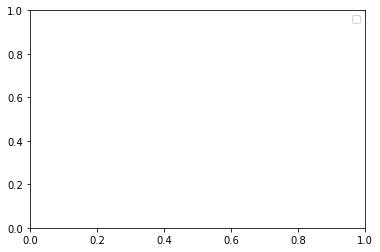

In [14]:
test.plot(ax = ax)
plt.legend(['train', 'test'])

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [16]:
train.head()

,Unadjusted
Adjustments,
1991-01-31,12588862
1991-02-28,12154321
1991-03-31,14337072
1991-04-30,15108570
1991-05-31,17225734


In [17]:
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [18]:
# train_sc

In [19]:
# test_sc

In [20]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index = test.index)

In [21]:
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [22]:
test_sc_df.head()

,Scaled
Adjustments,
2011-01-31,0.614232
2011-02-28,0.569266
2011-03-31,0.772596
2011-04-30,0.835057
2011-05-31,0.899933


In [23]:
X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [24]:
X_test.head()

""
Adjustments
2011-01-31
2011-02-28
2011-03-31
2011-04-30
2011-05-31


In [25]:
y_test.head()

,Scaled
Adjustments,
2011-01-31,0.614232
2011-02-28,0.569266
2011-03-31,0.772596
2011-04-30,0.835057
2011-05-31,0.899933


In [26]:
for s in range(1,13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [27]:
train_sc_df.describe()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,240.000000,239.000000,238.000000,237.000000,236.000000,235.000000,234.000000,233.000000,232.000000,231.000000,230.000000,229.000000,228.000000
mean,0.420985,0.418563,0.416898,0.415272,0.413646,0.411940,0.410008,0.408054,0.406160,0.404522,0.403080,0.402519,0.401664
std,0.241028,0.238588,0.237695,0.236869,0.236042,0.235085,0.233712,0.232292,0.230983,0.230130,0.229584,0.229929,0.230070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.211260,0.210050,0.208841,0.207631,0.207044,0.206457,0.205870,0.205282,0.204648,0.204014,0.203380,0.202746,0.202611
50%,0.387050,0.383386,0.383247,0.383108,0.382566,0.382023,0.380370,0.378716,0.376887,0.375058,0.373580,0.372102,0.371540
75%,0.600857,0.599528,0.598398,0.597349,0.595715,0.593959,0.592390,0.591318,0.591266,0.590253,0.587838,0.589258,0.584998
max,1.000000,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722,0.929722


In [28]:
train_sc_df.head()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.01402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.00000,0.01402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
test_sc_df.head()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
2011-01-31,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-31,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
X_train.tail()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
2010-08-31,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447,0.770968
2010-09-30,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447
2010-10-31,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687
2010-11-30,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290
2010-12-31,0.814829,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722


In [31]:
y_train = train_sc_df.dropna()[['Scaled']]
y_train.tail()

,Scaled
Adjustments,
2010-08-31,0.814394
2010-09-30,0.799167
2010-10-31,0.802101
2010-11-30,0.814829
2010-12-31,1.000000


In [32]:
X_test =test_sc_df.dropna().drop('Scaled', axis = 1)
y_test=test_sc_df.dropna()[['Scaled']]

## ndarray 변환

In [33]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [34]:
#reshape 2차원 : 로우, 칼럼 // 3차원 : 로우, 칼럼, 시간
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

In [35]:
X_train_t

array([[[0.20091289],
        [0.13173822],
        [0.11139526],
        ...,
        [0.0704258 ],
        [0.        ],
        [0.01402033]],

       [[0.03002688],
        [0.20091289],
        [0.13173822],
        ...,
        [0.09531795],
        [0.0704258 ],
        [0.        ]],

       [[0.01999285],
        [0.03002688],
        [0.20091289],
        ...,
        [0.16362761],
        [0.09531795],
        [0.0704258 ]],

       ...,

       [[0.79916654],
        [0.81439355],
        [0.86398323],
        ...,
        [0.92972161],
        [0.71629034],
        [0.77368724]],

       [[0.80210057],
        [0.79916654],
        [0.81439355],
        ...,
        [0.59734863],
        [0.92972161],
        [0.71629034]],

       [[0.81482896],
        [0.80210057],
        [0.79916654],
        ...,
        [0.53166512],
        [0.59734863],
        [0.92972161]]])

In [36]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
K.clear_session()
model = Sequential()
model.add(LSTM(20, input_shape=(12,1)))
model.add(Dense(1))

In [38]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, y_train, epochs = 100, batch_size=30, verbose=1)

Epoch 1/100
228/228 [==============================] - 1s 3ms/step - loss: 0.1597
Epoch 2/100
228/228 [==============================] - 0s 201us/step - loss: 0.0907
Epoch 3/100
228/228 [==============================] - 0s 197us/step - loss: 0.0397
Epoch 4/100
228/228 [==============================] - 0s 192us/step - loss: 0.0154
Epoch 5/100
228/228 [==============================] - 0s 192us/step - loss: 0.0162
Epoch 6/100
228/228 [==============================] - 0s 201us/step - loss: 0.0134
Epoch 7/100
228/228 [==============================] - 0s 197us/step - loss: 0.0115
Epoch 8/100
228/228 [==============================] - 0s 197us/step - loss: 0.0112
Epoch 9/100
228/228 [==============================] - 0s 188us/step - loss: 0.0100
Epoch 10/100
228/228 [==============================] - 0s 192us/step - loss: 0.0094
Epoch 11/100
228/228 [==============================] - 0s 179us/step - loss: 0.0089
Epoch 12/100
228/228 [==============================] - 0s 206us/step - loss

228/228 [==============================] - 0s 188us/step - loss: 0.0041
Epoch 98/100
228/228 [==============================] - 0s 184us/step - loss: 0.0040
Epoch 99/100
228/228 [==============================] - 0s 184us/step - loss: 0.0039
Epoch 100/100
228/228 [==============================] - 0s 184us/step - loss: 0.0038


In [39]:
y_pred = model.predict(X_test_t)

## 데이터 시각화

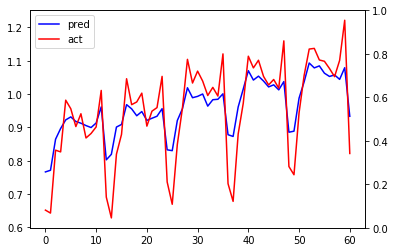

In [46]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

pred = y_pred

loss_ax.plot(pred, 'b', label='pred')

loss_ax.plot(y_test, 'r', label='act')

loss_ax.legend(loc='upper left')

plt.show()

## 데이터 시각화(2)

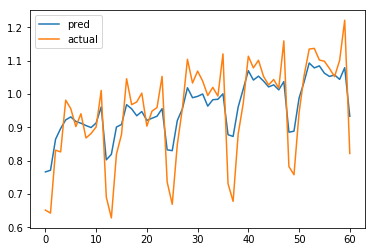

In [84]:
fig = plt.figure()
# fig = plt.figure(figsize=(10,5))

plt.plot(pred, label='pred')
plt.plot(y_test, label='actual')
# plt.twinx()

pred = y_pred

plt.legend(loc='upper left')

plt.show()